In [1]:
# standard imports 
import pandas as pd 
import numpy as np 

# bayesian modeling 
import pymc as pm
import xarray as xr 
from scipy.stats import gamma

# visualizations
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import arviz as az 
%matplotlib inline
style.use("fivethirtyeight")

# transformers 
from sklearn.preprocessing import OneHotEncoder

In [14]:
# reading in our dataset 

nys_gradrates_df = pd.read_csv("../data/2022_nys_gradrates_compiled.csv")

In [15]:
# previewing first five rows of our dataset
nys_gradrates_df.head()

,entity_cd,county,district,nrc_index,school,year,subgroup,grad_rate
0,10100010034,Albany,Albany City Sd,3,Albany High School,2022,Hispanic or Latino,73.7
1,10100010034,Albany,Albany City Sd,3,Albany High School,2022,White,86.9
2,10100010034,Albany,Albany City Sd,3,Albany High School,2022,Multiracial,77.4
3,10100010034,Albany,Albany City Sd,3,Albany High School,2022,English Language Learner,70.4
4,10100010034,Albany,Albany City Sd,3,Albany High School,2022,Economically Disadvantaged,75.5


In [16]:
# transforming subgroups into binary form using pd.getdummies
subgroup_enc = pd.get_dummies(nys_gradrates_df.subgroup,dtype='int64')

# concatenating our two dataframes 
nys_gradrates_df = pd.concat([nys_gradrates_df,subgroup_enc],axis=1)

# dropping the pre-encoded subgroup column
nys_gradrates_df = nys_gradrates_df.drop(columns=["subgroup"])

# shifting column order for readability
nys_gradrates_df = nys_gradrates_df[["entity_cd","county","district","nrc_index","school","year",
                  "American Indian or Alaska Native", "Asian or Native Hawaiian/Other Pacific Islander",
                  "Black or African American","Economically Disadvantaged","English Language Learner",
                  "Hispanic or Latino","Multiracial","Students with Disabilities","White","grad_rate"]]
# standardizing the percentages to be floats
nys_gradrates_df.grad_rate = nys_gradrates_df.grad_rate/100

In [17]:
nys_gradrates_df.head()

,entity_cd,county,district,nrc_index,school,year,American Indian or Alaska Native,Asian or Native Hawaiian/Other Pacific Islander,Black or African American,Economically Disadvantaged,English Language Learner,Hispanic or Latino,Multiracial,Students with Disabilities,White,grad_rate
0,10100010034,Albany,Albany City Sd,3,Albany High School,2022,0,0,0,0,0,1,0,0,0,0.737
1,10100010034,Albany,Albany City Sd,3,Albany High School,2022,0,0,0,0,0,0,0,0,1,0.869
2,10100010034,Albany,Albany City Sd,3,Albany High School,2022,0,0,0,0,0,0,1,0,0,0.774
3,10100010034,Albany,Albany City Sd,3,Albany High School,2022,0,0,0,0,1,0,0,0,0,0.704
4,10100010034,Albany,Albany City Sd,3,Albany High School,2022,0,0,0,1,0,0,0,0,0,0.755


### Setting Up Our Priors

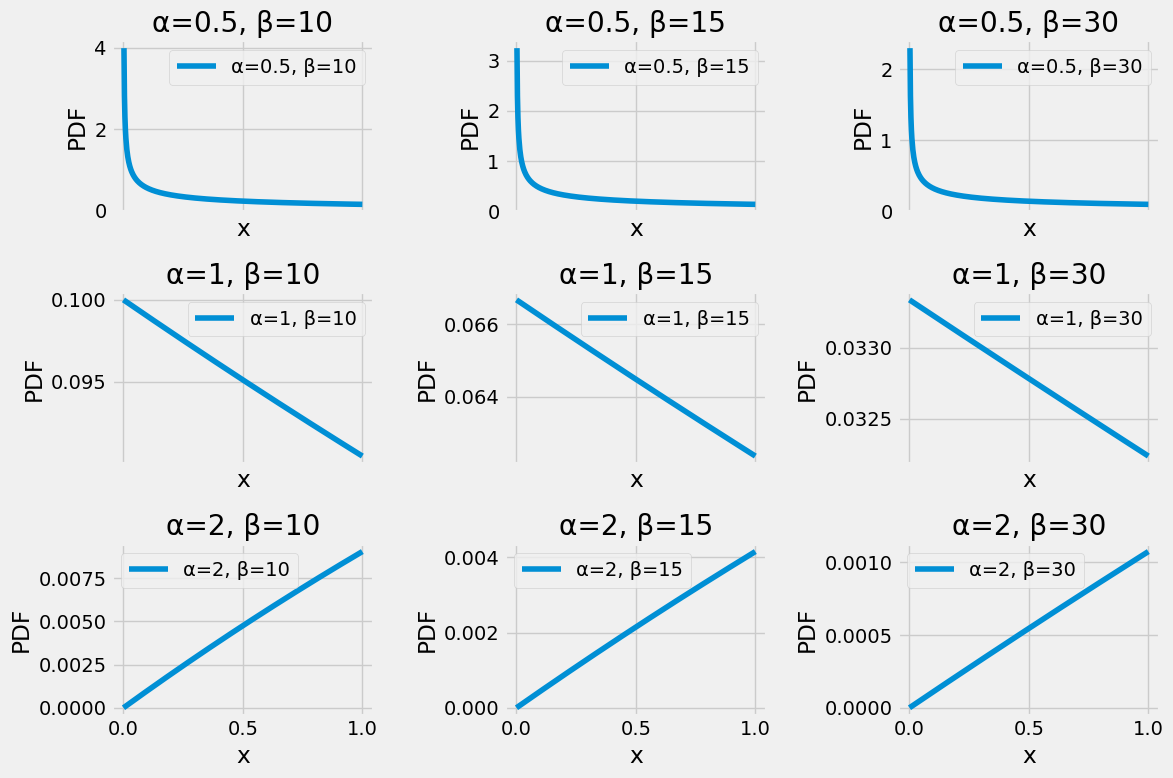

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define a range of x values for the plot
x = np.linspace(0, 1, 500)

# Define different shape (α) and scale (β) parameters for the gamma distribution
shape_params = [0.5, 1, 2]
scale_params = [10, 15, 30]

# Create a grid of subplots for different parameter combinations
fig, axes = plt.subplots(len(shape_params), len(scale_params), figsize=(12, 8), sharex=True)

# Loop through different parameter combinations and plot the gamma distribution
for i, shape in enumerate(shape_params):
    for j, scale in enumerate(scale_params):
        # Calculate the probability density function (PDF) for the gamma distribution
        pdf = gamma.pdf(x, shape, scale=scale)
        
        # Plot the PDF for the current parameter combination
        axes[i, j].plot(x, pdf, label=f'α={shape}, β={scale}')
        axes[i, j].set_title(f'α={shape}, β={scale}')
        axes[i, j].set_xlabel('x')
        axes[i, j].set_ylabel('PDF')
        axes[i, j].legend()

# Adjust the layout of subplots
plt.tight_layout()

# Show the plots
plt.show()

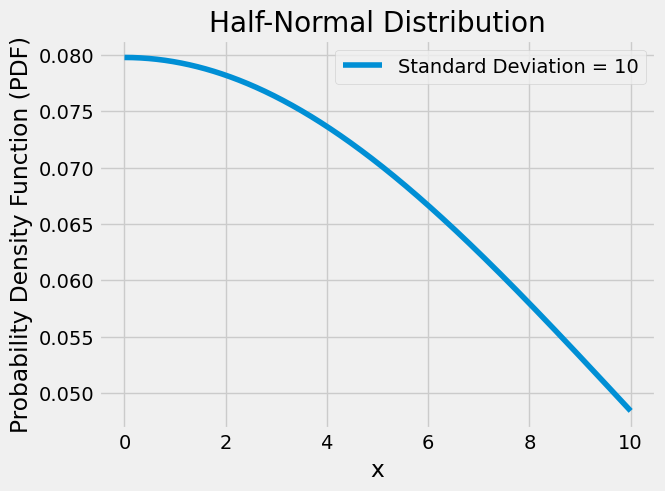

In [56]:
from scipy.stats import halfnorm

# Set the standard deviation for the half-normal distribution
std_dev = 10

# Create a range of x values for the plot (only positive values)
x = np.linspace(0, 1 * std_dev, 1000)

# Calculate the probability density function (PDF) for the half-normal distribution
pdf = halfnorm.pdf(x, scale=std_dev)

# Plot the PDF of the weakly informative half-normal distribution
plt.plot(x, pdf, label=f'Standard Deviation = {std_dev}')

plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('Half-Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()
